In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

#### Q-1: Using Gapminder Data
##### 1.Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [7]:
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

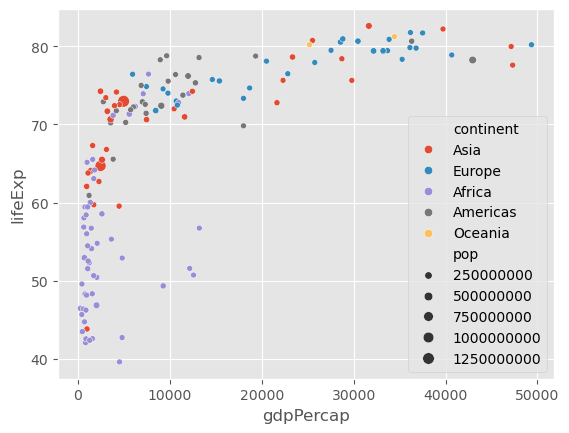

In [11]:
temp_df = df[df['year'] == 2007]
sns.scatterplot(data = temp_df , x = 'gdpPercap' , y = 'lifeExp', size = 'pop', hue = 'continent')

#### Q-2-3: Using flights dataset of seaborn.

In [12]:
df = sns.load_dataset('flights')
df.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


##### 2.Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

In [34]:
temp_df = df.pivot_table(index = 'month' , columns = 'year', values = 'passengers', aggfunc = 'mean', observed = False)
temp_df.head()
# Observed = False to silent warning

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


<Axes: xlabel='year', ylabel='month'>

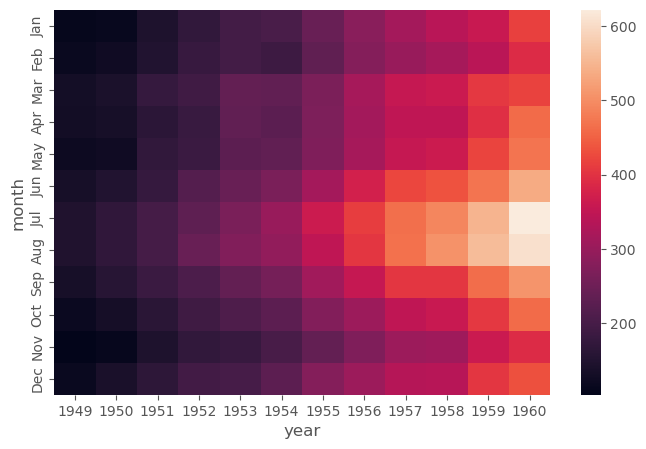

In [35]:
plt.figure(figsize = (8,5))
sns.heatmap(temp_df )

##### 3.Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.

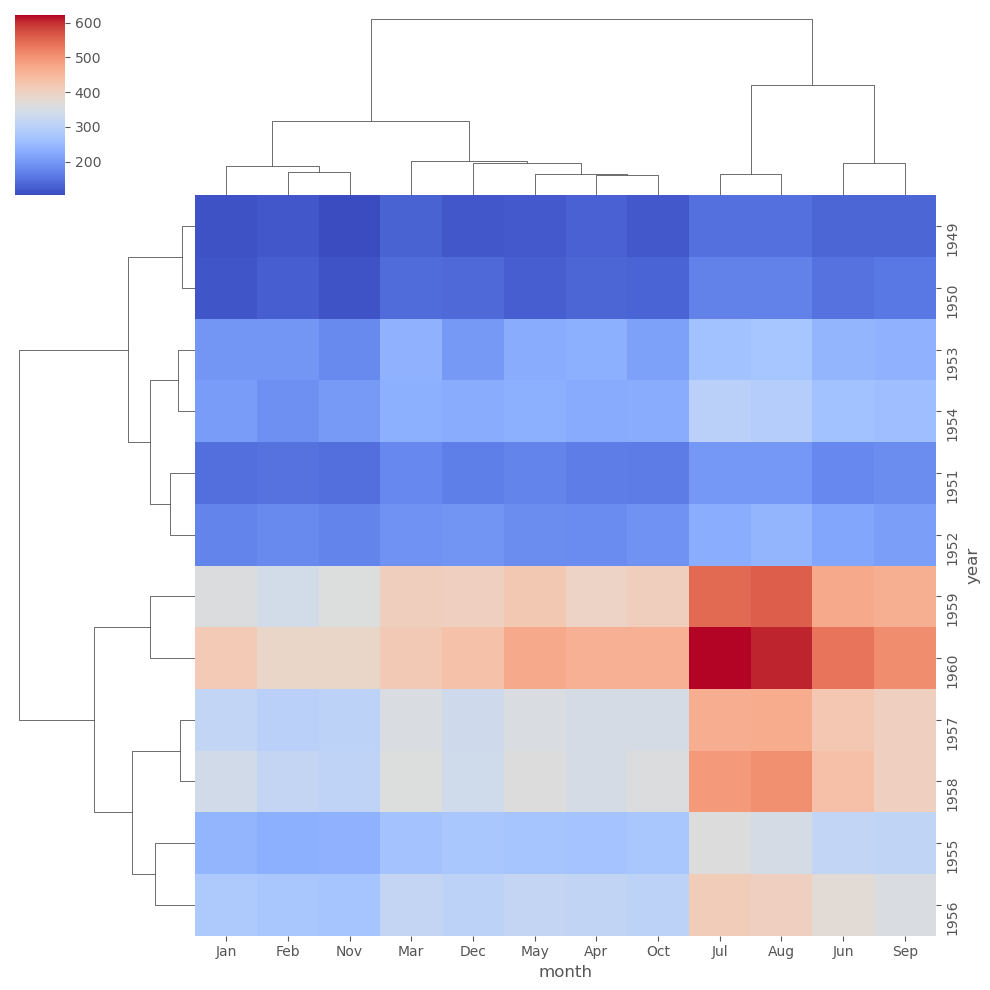

In [37]:
temp_df = df.pivot_table(index='year', columns='month',values='passengers',aggfunc='mean', observed = False)
# sns.clustermap(df) -->> gives error coz dtype of month is string while months and year are float so we can do this
# By indexing -->> as we need each row but 
sns.clustermap(temp_df,cmap = 'coolwarm')

#### For questions 4-8:
#### For these qestions, an insurance dataset is used.

In [39]:
df = pd.read_csv(r"C:\Users\deepu\OneDrive\Desktop\Python\insurance dataset.csv")
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


#### .Q-4: Draw a scatter plot based on the below conditions:
##### 1.x-axis should be "age" and y-axis should be "bmi".
##### 2.For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
##### 3.Add title to your chart.
##### 4.Age should be less than 70 percentiles.
##### 5.BMI should be greater than the average value of the filtered age dataset.

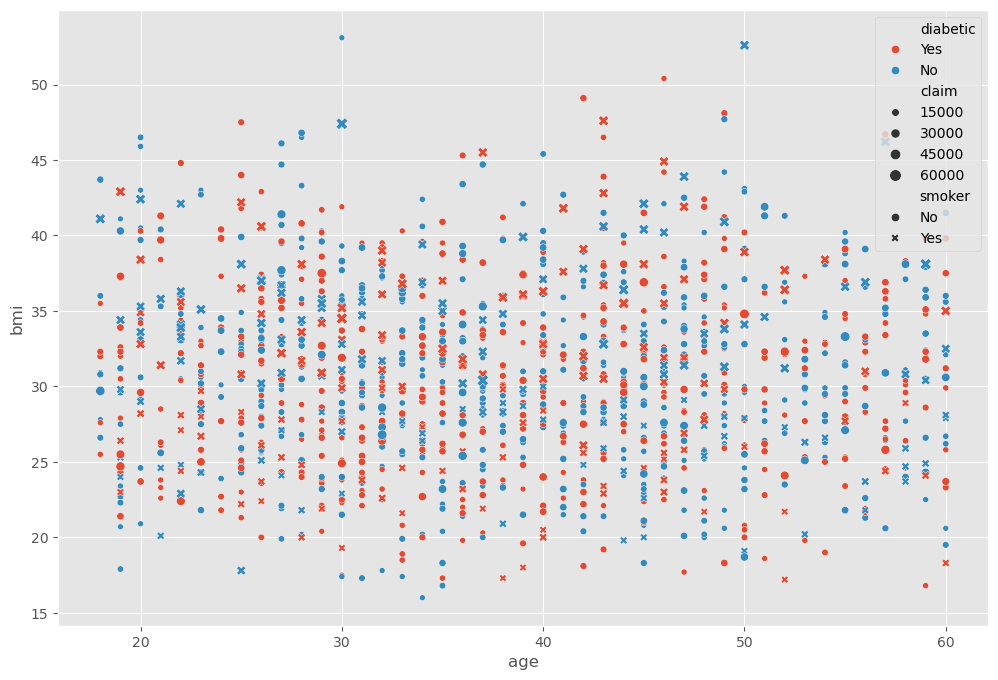

In [41]:
# Modifying data according to question
temp_df = df[df['age'] < df['age'].quantile(0.70)] # Age less than 70 percentile
temp_df = temp_df[temp_df['bmi'] > temp_df['bmi'].mean()] # BMI greater than the avg. value of filtered age dataset

# Plotting
plt.subplots(figsize = (12,8))
sns.scatterplot(data = df , x = 'age' , y = 'bmi', hue = 'diabetic', size = 'claim' , style = 'smoker')
plt.show()

#### Q-5: Draw a line plot by using the below informations
##### 1.bloodpressure vs children
##### 2.Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
##### 3.Show the details of "smoker".

In [47]:
df.head()
temp_df = df.query("bloodpressure >=90 and bloodpressure <= 100")
temp_df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,1306,57.0,female,46.2,96,No,0,Yes,southeast,45863.21
1310,1310,1311,26.0,female,37.1,95,No,3,Yes,northeast,46255.11
1314,1314,1315,22.0,male,33.9,97,No,0,Yes,southeast,46889.26
1319,1319,1320,40.0,male,36.3,94,Yes,1,Yes,southwest,47403.88


<Axes: xlabel='bloodpressure', ylabel='children'>

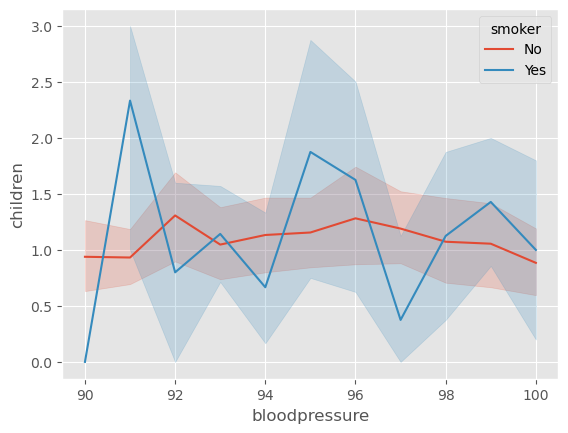

In [51]:
sns.lineplot(data = temp_df , x = 'bloodpressure', y = 'children', hue = 'smoker')
# If you want you can remove this shadows by errorbar = None

<Axes: xlabel='bloodpressure', ylabel='children'>

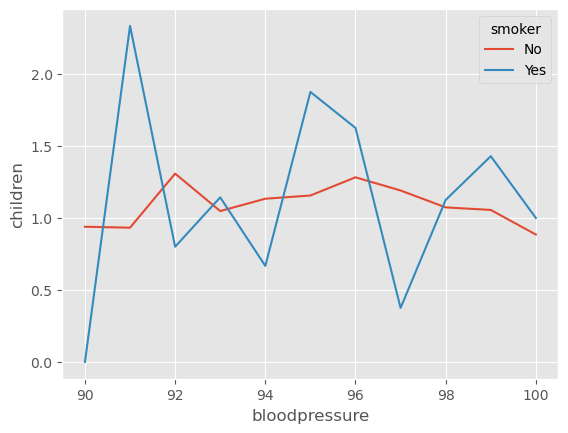

In [52]:
sns.lineplot(data = temp_df , x = 'bloodpressure', y = 'children', hue = 'smoker', errorbar = None)

#### Q-6: Draw a histogram using displot
##### 1.based on "age" column.
##### 2.Show details of "smoker" (hue).
##### 3.Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

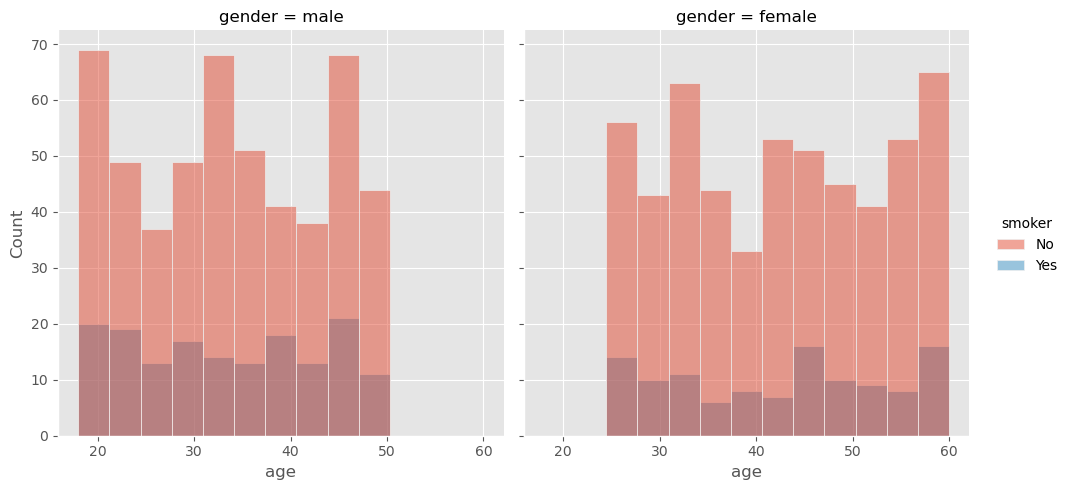

In [54]:
sns.displot(data = df , x = 'age' , kind = 'hist', hue = 'smoker' , col = 'gender',cmap = )

#### Q-7: Draw a kde plot between "age" and "bloodpressure".

<Axes: xlabel='age', ylabel='bloodpressure'>

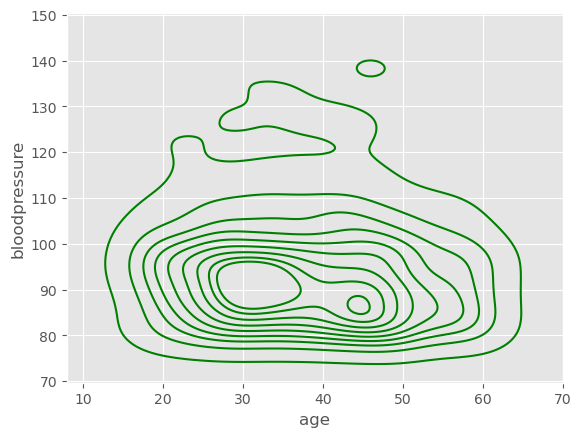

In [56]:
sns.kdeplot(data = df , x = 'age' , y = 'bloodpressure', color = 'green')

#### Q-8: Draw a clustermap between between "age", "bmi" and "bloodpressure".

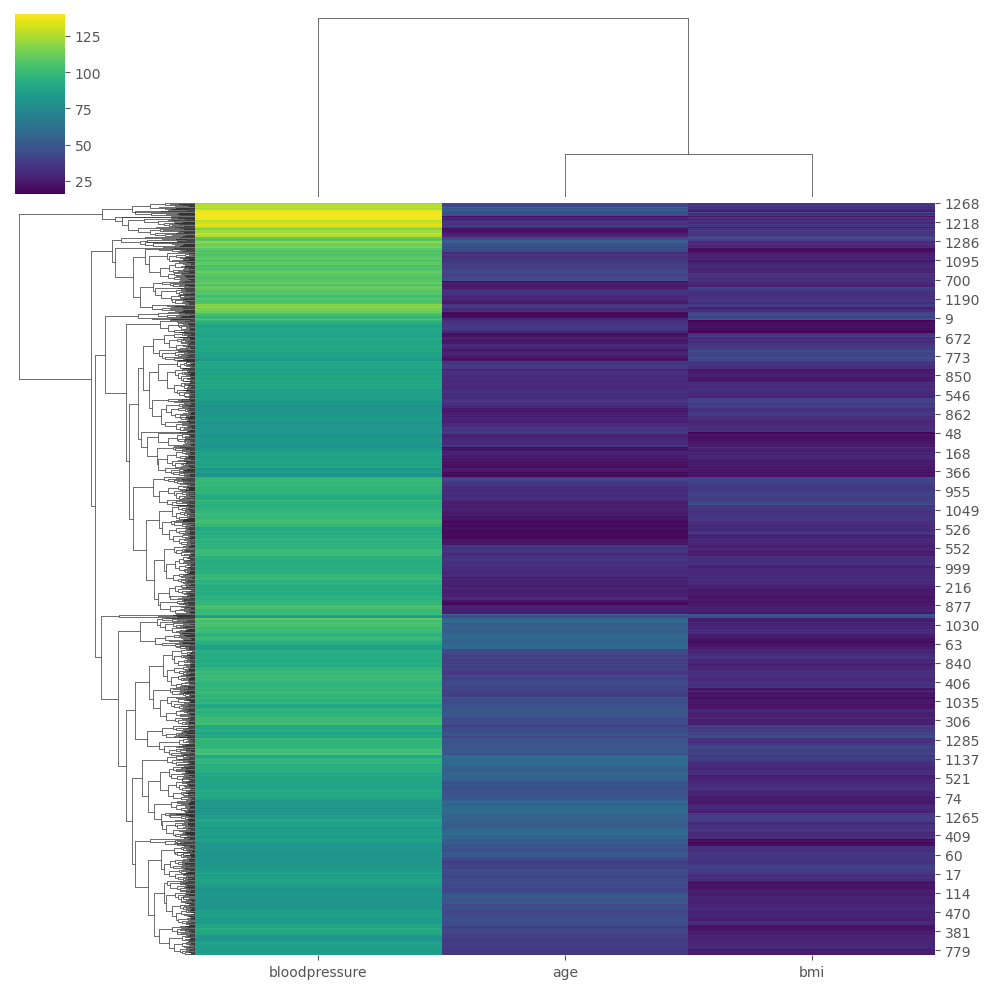

In [63]:
df.head()
sns.clustermap(df[['age','bmi','bloodpressure']].dropna(),cmap = 'viridis')